In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student_performances.csv to student_performances (1).csv


# In this tutorial you are given a task of classifying students grades bases on various properties of the students and their families. The students can have 5 kinds of grades - Excellent, Very good, Good, Satisfactory, and poor.

# You need to develop different classifiers and determine which one of them give best performaces on various metrices.

# Import Libraries.
## I have imported few new libraries for this week  but you need to import rest of them.

In [50]:

# Your code to import all the relevant libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay


# Read and display dataset.

In [2]:
# Your code to read data

dataset = pd.read_csv("student_performances.csv")

# Your code to print first few samples of the dataset.

dataset.head()


,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grades
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,no,4,3,4,1,1,3,6,poor
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,no,5,3,3,1,1,3,4,poor
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,no,4,3,2,2,3,3,10,satisfactory
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,3,2,2,1,1,5,2,very good
4,F,16,U,GT3,T,3,3,other,other,home,...,no,no,4,3,2,1,2,5,4,satisfactory


# Print the information about the dataset.

## You need to convert all the object datatypes (except output variable - grades) to the numbers using either labelencoding or one hot encoding.

In [3]:
# Your code to print the key information about the datset. Use - .info method.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   address     395 non-null    object
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   reason      395 non-null    object
 10  guardian    395 non-null    object
 11  traveltime  395 non-null    int64 
 12  studytime   395 non-null    int64 
 13  failures    395 non-null    int64 
 14  schoolsup   395 non-null    object
 15  famsup      395 non-null    object
 16  paid        395 non-null    object
 17  activities  395 non-null    object
 18  nursery     395 non-null    object
 19  higher      395 non-null    object
 20  internet  

# Converting the columns  ['Fjob', 'Mjob', 'reason', 'guardian'] into one hot vectors.

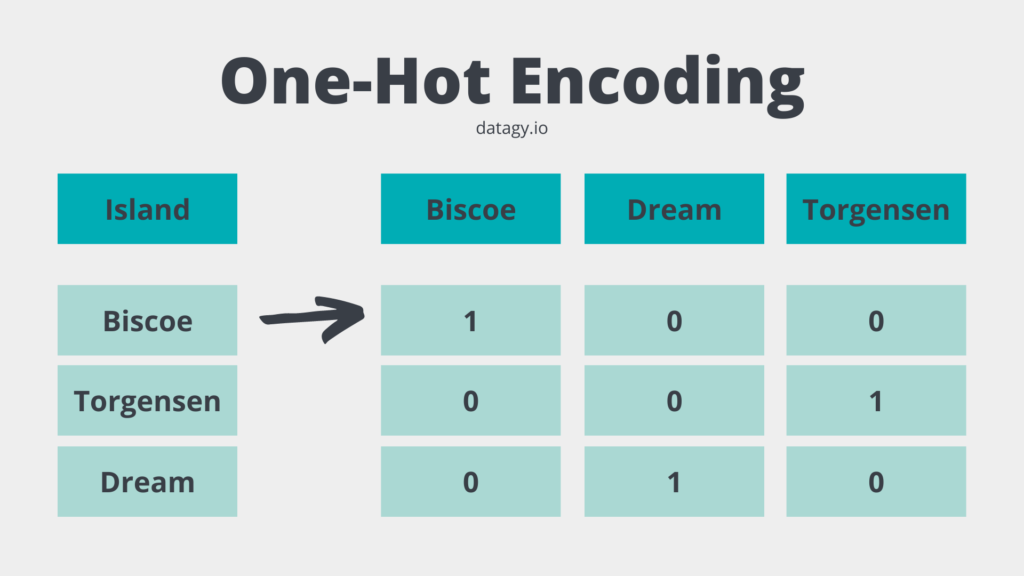

In [4]:
data = pd.get_dummies(dataset, columns = ['Fjob', 'Mjob', 'reason', 'guardian'], dtype=int)


# Note that you can also use sklearn.preprocessing.OneHotEncoder instead of pd.get_dummies.

# Next, print the first few rows of the data (dataset have been stored in data in previous cell).

In [5]:
data.head()
# Your code to print first few rows of the data.

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,F,18,U,GT3,A,4,4,2,2,0,...,0,0,0,1,0,0,0,0,1,0
1,F,17,U,GT3,T,1,1,1,2,0,...,0,0,0,1,0,0,0,1,0,0
2,F,15,U,LE3,T,1,1,1,2,3,...,0,0,0,0,0,1,0,0,1,0
3,F,15,U,GT3,T,4,2,1,3,0,...,0,0,0,0,1,0,0,0,1,0
4,F,16,U,GT3,T,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0


In [6]:
print(data.columns,"\n\n",dataset.columns)

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'grades',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object') 

 Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'grades'],
      dtype='o

# Converting other text values in the dataframe to numbers using label encoding.

In [7]:
labelencoder = LabelEncoder()

labelencoder.fit(data['sex'])
data ['sex'] = labelencoder.transform(data['sex'])

#
## Your code to convert transform address to the numbers
#
labelencoder.fit(data['address'])
data ['address'] = labelencoder.transform(data['address'])

#
## Your code to convert transform famsize to the numbers
##

labelencoder.fit(data['famsize'])
data ['famsize'] = labelencoder.transform(data['famsize'])



#
## Your code to convert transform Pstatus to the numbers
#
labelencoder.fit(data['Pstatus'])
data ['Pstatus'] = labelencoder.transform(data['Pstatus'])


#
## Your code to convert transform schoolsup to the numbers
#
labelencoder.fit(data['schoolsup'])
data ['schoolsup'] = labelencoder.transform(data['schoolsup'])


#
## Your code to convert transform famsup to the numbers
#
labelencoder.fit(data['famsup'])
data ['famsup'] = labelencoder.transform(data['famsup'])

#
## Your code to convert transform paid to the numbers
#
labelencoder.fit(data['paid'])
data ['paid'] = labelencoder.transform(data['paid'])


#
## Your code to convert transform activities to the numbers
#
labelencoder.fit(data['activities'])
data ['activities'] = labelencoder.transform(data['activities'])


#
## Your code to convert transform nursery to the numbers
#

labelencoder.fit(data['nursery'])
data ['nursery'] = labelencoder.transform(data['nursery'])

#
## Your code to convert transform higher to the numbers
#
labelencoder.fit(data['higher'])
data ['higher'] = labelencoder.transform(data['higher'])


#
## Your code to convert transform internet to the numbers
#
labelencoder.fit(data['internet'])
data ['internet'] = labelencoder.transform(data['internet'])

#
## Your code to convert transform romantic to the numbers
#
labelencoder.fit(data['romantic'])
data ['romantic'] = labelencoder.transform(data['romantic'])


# Is their an efficient way to do this? Could you use loops. Try to convert it into an efficient code and replace with the above code?


# Next - Print few samples of the data to ensure everything is number except 'grades' column.

In [8]:
# Your code to print first few samples of the data.
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,0,4,4,2,2,0,...,0,0,0,1,0,0,0,0,1,0
1,0,17,1,0,1,1,1,1,2,0,...,0,0,0,1,0,0,0,1,0,0
2,0,15,1,1,1,1,1,1,2,3,...,0,0,0,0,0,1,0,0,1,0
3,0,15,1,0,1,4,2,1,3,0,...,0,0,0,0,1,0,0,0,1,0
4,0,16,1,0,1,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0


In [9]:
# Your code to print information on the samples of data.
data.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'grades',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

# Separate input X and output y.

## X is the all columns except 'grades'.
## y is 'grades' column.

In [10]:
data["grades"].value_counts()


poor            130
satisfactory    103
good             62
very good        60
excellent        40
Name: grades, dtype: int64

In [11]:
# Your code to get X from data
# Your code to get y from data

X = data.drop("grades",axis=1).values


labelencoder.fit(data['grades'])
data ['grades'] = labelencoder.transform(data['grades'])


y = data["grades"].values


# Print shapes of X and y to make sure everything is good

In [25]:
# Print shape of X
# Print shape of y
# Print X
# Print y
print("Shape of X ",X.shape)
print("Shape of y",y.shape)
print(X)
print(y)


Shape of X  (395, 42)
Shape of y (395,)
[[ 0 18  1 ...  0  1  0]
 [ 0 17  1 ...  1  0  0]
 [ 0 15  1 ...  0  1  0]
 ...
 [ 1 21  0 ...  0  0  1]
 [ 1 18  0 ...  0  1  0]
 [ 1 19  1 ...  1  0  0]]
[2 2 3 4 3 4 3 2 0 4 2 1 4 3 0 4 4 3 2 3 4 4 0 1 2 2 3 4 3 3 1 0 0 1 4 2 0
 4 3 1 3 1 0 3 2 2 3 0 4 2 1 1 3 3 1 3 4 4 2 0 3 3 2 2 3 4 1 2 2 0 4 3 2 4
 3 3 3 3 3 2 1 3 2 4 3 2 2 4 3 2 2 0 2 3 4 3 4 3 4 2 2 0 4 2 0 3 2 0 1 0 0
 3 1 0 2 0 4 1 2 1 4 4 1 1 2 1 3 2 2 0 2 2 1 3 2 2 2 2 1 4 2 2 3 1 2 3 2 3
 2 3 2 4 3 2 1 2 1 3 4 1 2 2 2 3 2 1 3 0 2 4 2 0 3 2 2 2 3 2 2 3 2 1 0 2 1
 3 3 4 2 3 1 2 2 3 4 4 0 3 0 3 0 3 3 2 3 2 2 1 3 2 2 1 4 2 3 4 2 2 2 3 2 2
 0 1 4 2 4 1 2 1 4 3 2 1 2 3 1 1 3 2 1 1 2 1 2 0 1 2 2 4 2 3 2 2 1 2 1 3 4
 2 0 2 1 2 2 0 3 3 3 2 2 4 3 4 3 1 2 2 2 3 2 3 1 3 3 3 0 1 4 4 3 4 1 0 4 3
 2 2 4 0 3 3 4 0 1 1 0 2 1 3 2 1 3 3 1 3 2 2 3 3 1 2 3 4 4 3 0 3 2 4 2 4 2
 2 2 4 1 2 0 3 3 2 4 2 3 4 0 2 4 1 2 1 2 2 3 2 1 3 3 0 1 1 3 4 1 3 1 2 3 3
 2 1 3 2 0 3 4 3 4 3 4 2 3 2 2 3 2 2 2 2 2 0 2 3 2]


# Next  - Split data into train and test set.

In [26]:
# Your code to split data into train and test set.

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=104,train_size=0.6, shuffle=True) 




print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#
#
# Print shapes of train and test data to make sure everyhing is in order.
#
#


(237, 42) (158, 42) (237,) (158,)


In [75]:
algorithms = ["SVG","KNN","Logistic"]
all_accuracies = []

# Next - Develop a SVM classifier and fit into the train dataset.

In [76]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC()

# Next - prdict the values on the input test set.

# Find accuracy, precision, recall, f-score.

In [78]:
y_pred = classifier.predict(X_test)

print (print("Accuracy test set: ", accuracy_score(y_test, y_pred)))
print (print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )))
print (print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' )))
print (print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' )))
all_accuracies.append(accuracy_score(y_test, y_pred))

Accuracy test set:  0.36075949367088606
None
Precision test set:  0.36075949367088606
None
Recall test set:  0.36075949367088606
None
F-score test set:  0.36075949367088606
None


# Find accuracy, precision, recall, and f-score on training dataset.

In [68]:
train_data_predictions = classifier.predict(X_train)

print (print("Accuracy train set: ", accuracy_score(y_train, train_data_predictions)))
print (print("Precision train set: ", precision_score(y_train, train_data_predictions, average = 'micro' )))
print (print("Recall train set: ", recall_score(y_train, train_data_predictions, average = 'micro' )))
print (print("F-score train set: ", f1_score(y_train, train_data_predictions, average = 'micro' )))

Accuracy train set:  0.3080168776371308
None
Precision train set:  0.3080168776371308
None
Recall train set:  0.3080168776371308
None
F-score train set:  0.3080168776371308
None


# Display confusion matrix between actual and predicted values on the test data.

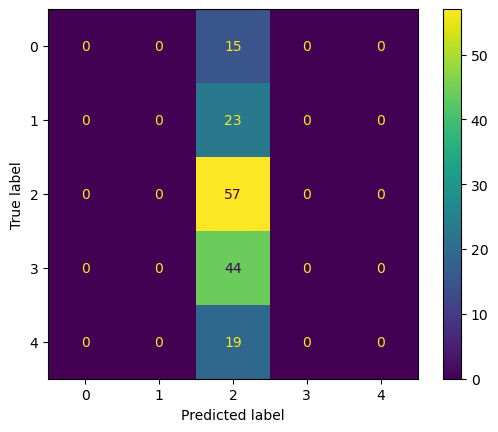

In [69]:
#
# Your code to display confusion matrix between predicted output and actual output
#
#

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = classifier.classes_)
disp.plot()
plt.show()


# Earlier, we used rfb Kernel. Now, we will test other kernels too.

# We will test on ['linear', 'poly', 'rbf', 'sigmoid' ] kernels.

Accuracy test set:  27.848101265822784 %

Accuracy test set:  34.177215189873415 %

Accuracy test set:  36.075949367088604 %

Accuracy test set:  36.075949367088604 %



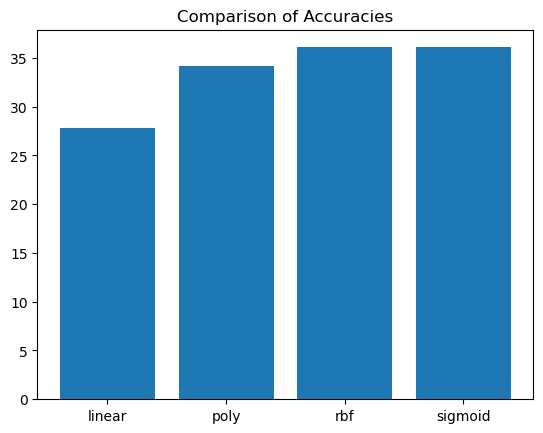

In [31]:
# Create a list kernels with values ['linear', 'poly', 'rbf', 'sigmoid' ]
# Create an empty list accuracy

accuracys = []


kernels = ['linear', 'poly', 'rbf', 'sigmoid' ]

for kernel in kernels:
    classifier = SVC(kernel = kernel)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Accuracy test set: ", accuracy_score(y_test, y_pred) *100,"%\n")
    accuracys.append(accuracy_score(y_test, y_pred)*100)
#
# Your code to plot accuracy vs kernels
#

plt.bar(kernels,accuracys)
plt.title("Comparison of Accuracies")
plt.show()

# Which Kernel function is giving you best accuracy?

# Next - Develop KNN and Losgistic regression classifiers for this dataset.

In [79]:
#
# Develop KNN-based classifier. Use number of neigbours of your choice
#
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
all_accuracies.append(accuracy_score(y_test, y_pred))

# Evaluate KNN for accuracy, precision, recall, f-score, and classification report on test data.

In [80]:
#
#
# Your code to evaluate the classifer on test data
#
#


print (knn.score(X_test, y_test)*100, " %")
print (classification_report(y_test, y_pred))

28.48101265822785  %
              precision    recall  f1-score   support

           0       0.05      0.07      0.05        15
           1       0.17      0.35      0.23        23
           2       0.46      0.39      0.42        57
           3       0.48      0.25      0.33        44
           4       0.17      0.16      0.16        19

    accuracy                           0.28       158
   macro avg       0.26      0.24      0.24       158
weighted avg       0.35      0.28      0.30       158



# Evaluate KNN for accuracy, precision, recall, f-score, and classification report on train data.



In [72]:
#
#
# Your code to evaluate the classifer on train data
#
#

print (knn.score(X_train, y_train)*100, " %")
print (classification_report(y_test, y_pred))



59.07172995780591  %
              precision    recall  f1-score   support

           0       0.05      0.07      0.05        15
           1       0.17      0.35      0.23        23
           2       0.46      0.39      0.42        57
           3       0.48      0.25      0.33        44
           4       0.17      0.16      0.16        19

    accuracy                           0.28       158
   macro avg       0.26      0.24      0.24       158
weighted avg       0.35      0.28      0.30       158



# Display confusion matric between predicted and actual values.

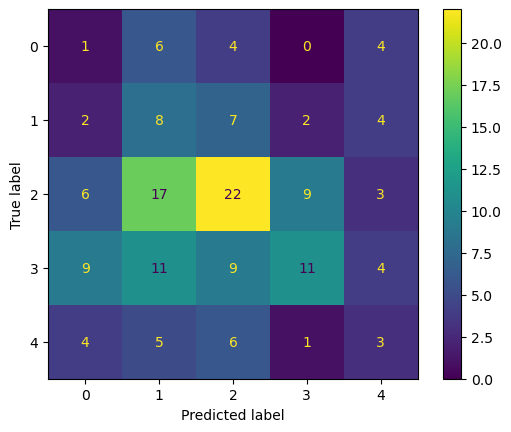

In [73]:
#
#
# Your code to display confusion matrix
#
#
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = knn.classes_)
disp.plot()
plt.show()

# Develop Logistic Regression-based classifier.

In [81]:
#
# Your code to develop logistic regression-based classifier
#

lclassifier = LogisticRegression(random_state = 0)
lclassifier.fit(X_train, y_train)
y_pred = lclassifier.predict(X_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluate Logistic Regression for accuracy, precision, recall, f-score, and classification report on test data.

In [82]:
#
#
#
# Your code to evaluate the logistic regression classifier on test data
#
#
#
all_accuracies.append(accuracy_score(y_test, y_pred))
print (print("Validation Accuracy: ",accuracy_score(y_test, y_pred)))
print (classification_report(y_test, y_pred))


Validation Accuracy:  0.35443037974683544
None
              precision    recall  f1-score   support

           0       0.10      0.07      0.08        15
           1       0.13      0.13      0.13        23
           2       0.59      0.58      0.58        57
           3       0.32      0.32      0.32        44
           4       0.20      0.26      0.23        19

    accuracy                           0.35       158
   macro avg       0.27      0.27      0.27       158
weighted avg       0.35      0.35      0.35       158



# Evaluate Logistic regression for accuracy, precision, recall, f-score, and classification report on train data.

In [ ]:
#
#
#
# Your code to evaluate the logistic regression classifier on train data
#
#
#

# Display confusion matrix between predicted and actual values for logistic regression.

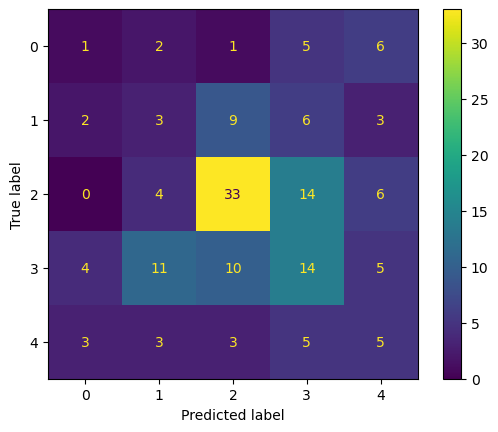

In [65]:
#
# Your code to display confusion matrix for logistic regression
#

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

Next, compare the accuracy, precision, recall, and F-score for all the classifiers using plots. You need to have only one plot rather than 4 different plots for 4 different meteruces.

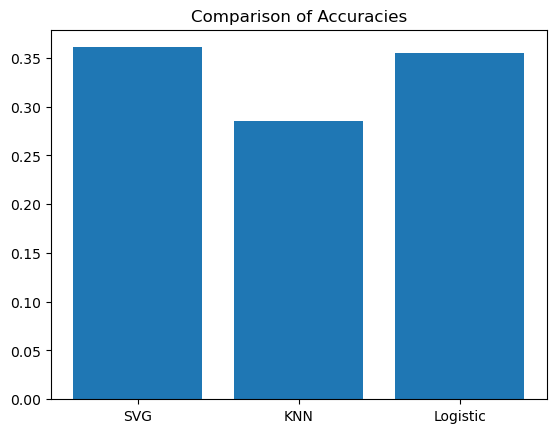

In [83]:
plt.bar(algorithms,all_accuracies)
plt.title("Comparison of Accuracies")
plt.show()


### **Important - Document in your Lab Logbook**

# 1.   Include a plot comparing the performance of various algorithms.
# 2.    Specify the best-performing algorithm and indicate which category exhibits the best and least performance based on the confusion metrics.

